https://www.alvinang.sg/s/iris_dataset.csv



---



#Step 1: Read in the Dataset and Split into Features and Target

In [1]:
import numpy as np
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split

# Read the Iris dataset into a Pandas DataFrame.
iris_df = pd.read_csv("https://www.alvinang.sg/s/iris_dataset.csv")

# Create a LabelEncoder object.
#le = LabelEncoder()

# Target
y = iris_df["species"]

# Features
X = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

# Optional: Split the data into a training set and a testing set.
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [2]:
pd.unique(iris_df["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)



---



#Step 2: Import and Train the Tree

In [3]:
from sklearn import tree

# Build the classifier based on Entropy (not GINI)
dtc = tree.DecisionTreeClassifier(criterion="entropy")

# Train the classifier
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [4]:
print(dtc.criterion)
#check on the criterion

entropy




---



#Step 3: Rank the Feature Importance Score and Plot

In [5]:
# Create a Pandas DataFrame.
feature_importances_df = pd.DataFrame(
    data={
        "feature": X.columns,
        "importance": dtc.feature_importances_,
    }
)

# Sort the DataFrame by the importance values.
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)

# Print the DataFrame.
display(feature_importances_df)

,feature,importance
2,petal_length,0.657034
3,petal_width,0.331379
1,sepal_width,0.011588
0,sepal_length,0.000000


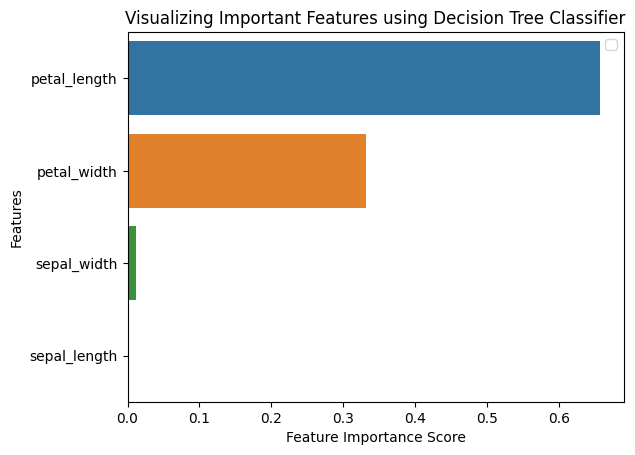

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x = feature_importances_df.importance, y = feature_importances_df.feature)

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features using Decision Tree Classifier')
plt.legend()
plt.show()



---



#Step 4: Visualize the Decision Tree

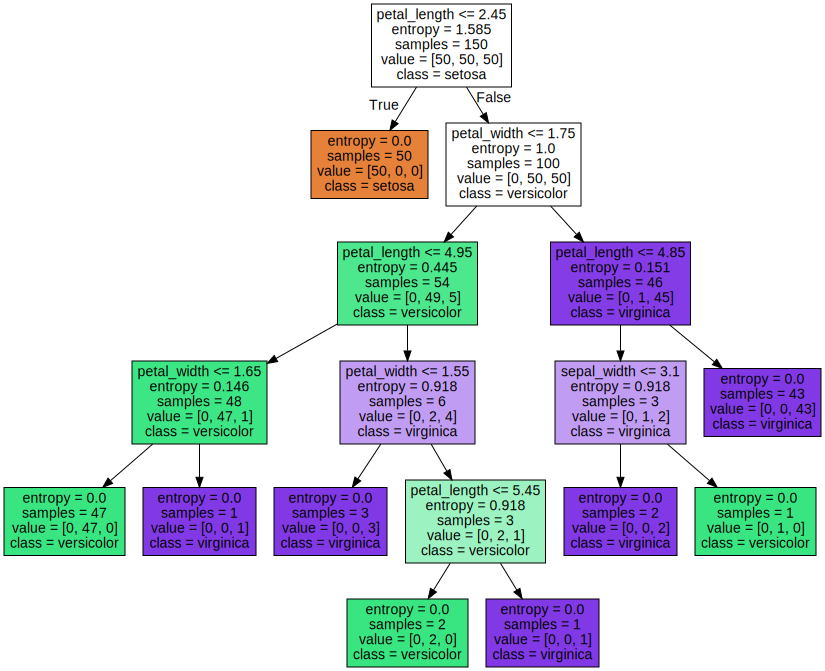

In [7]:
from graphviz import Source
graph = Source(tree.export_graphviz(dtc, out_file=None,
                     feature_names=X.columns,
                     class_names=pd.unique(iris_df["species"]),
                     filled=True,
                     #rounded=True,
                     #node_ids= False,
                     #special_characters=False
                                    ))
display(graph)

In [8]:
#Petal Width is the most important, followed by Petal length.
#the rest are not important.

---

#THE END


---



